<a href="https://colab.research.google.com/github/fboldt/aulas-am-bsi/blob/main/aula19b_regress%C3%A3o_linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [632]:
import matplotlib.pyplot as plt

def plot_dataset(X, y, xlim=(-0.15, 1.15), ylim=(-0.15, 1.15)):
  plt.plot(X[:,0], y, 'o',alpha=0.5)
  plt.xlim(*xlim)
  plt.ylim(*ylim)


[0.60522098 0.70664212 0.49756036 0.44484267 0.60931974 0.40976508
 0.62100115 0.62819472 0.62655437 0.6541573  0.53303535 0.40804509
 0.53888711 0.65784417 0.67302922 0.42262308 0.37626789 0.55356829
 0.32847037 0.6748253 ]


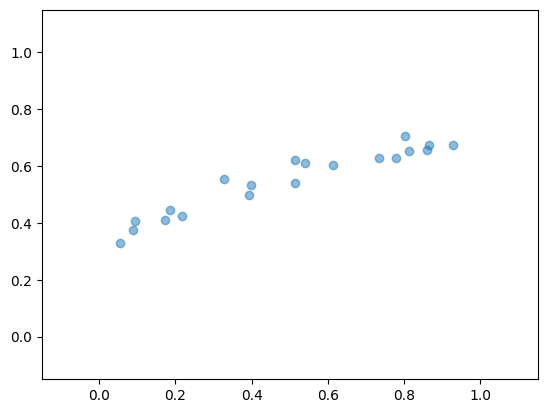

In [646]:
import numpy as np

def create_dataset(n=20, tilt=0.5, intercept=0.2):
  X = np.random.uniform(size=(n,1))
  AUX = np.random.rand(n,1)-0.5
  y = X**0.4 * tilt + intercept + AUX * 0.1
  return X, y.flatten()

tilt = 0.5
intercept = 0.2

X, y = create_dataset(tilt=tilt, intercept=intercept)
print(y)
plot_dataset(X, y)
plt.show()

In [634]:
def plot_line(angular_coeficient, intercept, xlim=(-0.15, 1.15), ylim=(-0.15, 1.15)):
  x = np.linspace(*xlim)
  y = x * angular_coeficient + intercept
  plt.plot(x, y, 'r')
  plt.xlim(*xlim)
  plt.ylim(*ylim)


[[0.37308964]] [0.36394935]
0.032722994329834026
0.039848474729641765


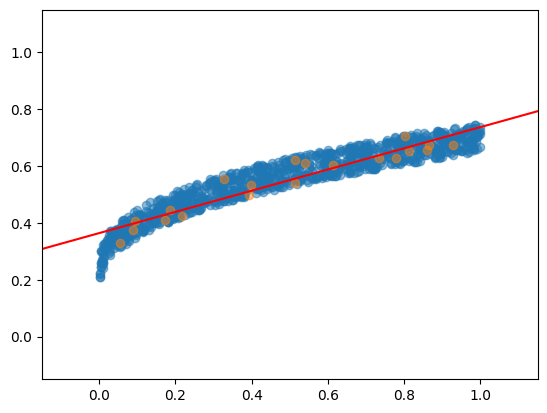

In [656]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.metrics import root_mean_squared_error

def include_bias(X):
  ones = np.ones(shape=(X.shape[0],1))
  return np.hstack((ones, X))

class Perceptron(BaseEstimator, ClassifierMixin):
  def __init__(self, max_iter=1000, learning_rate=0.01):
    self.max_iter = max_iter
    self.learning_rate = learning_rate

  def fit(self, X, y):
    X = include_bias(X)
    self.w_ = np.zeros(shape=(X.shape[1],1))
    y = y.reshape(-1, 1)
    for _ in range(self.max_iter):
      ypred = (X @ self.w_)
      error = (y - ypred).reshape(-1,1)
      self.w_ += X.T @ error * self.learning_rate
      cost = np.sum(error**2)
      if cost == 0:
        break

  def predict(self, X):
    X = include_bias(X)
    ypred = (X @ self.w_)
    return (ypred)

  def score(self, X, y):
    ypred = self.predict(X)
    return root_mean_squared_error(y, ypred)


model = Perceptron()
model.fit(X, y)
print(model.w_[1:], model.w_[0])
ypred = model.predict(X)
print(model.score(X, y))

X_test, y_test = create_dataset(1000, tilt=tilt, intercept=intercept)
print(model.score(X_test, y_test))
plot_dataset(X_test, y_test)
plot_dataset(X, y)
plot_line(model.w_[1], model.w_[0])
plt.show()

[[0.37308992]] [0.3639492]
0.03272299432973729
0.04070911884637547


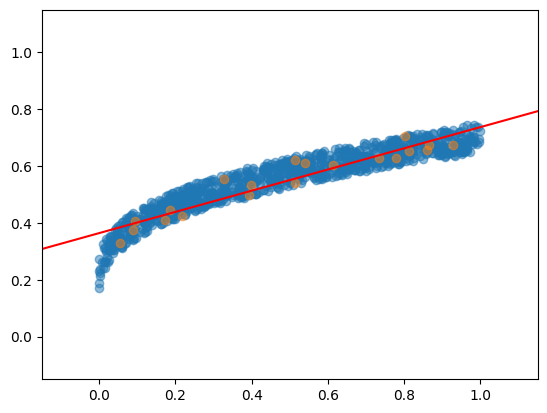

In [657]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.metrics import root_mean_squared_error

def include_bias(X):
  ones = np.ones(shape=(X.shape[0],1))
  return np.hstack((ones, X))

class Perceptron(BaseEstimator, ClassifierMixin):

  def fit(self, X, y):
    X = include_bias(X)
    #pinv = np.linalg.inv(X.T @ X) @ X.T
    self.w_ = np.linalg.pinv(X) @ y.reshape(-1,1)
    return self

  def predict(self, X):
    X = include_bias(X)
    ypred = (X @ self.w_)
    return (ypred)

  def score(self, X, y):
    ypred = self.predict(X)
    return root_mean_squared_error(y, ypred)


model = Perceptron()
model.fit(X, y)
print(model.w_[1:], model.w_[0])
ypred = model.predict(X)
print(model.score(X, y))

X_test, y_test = create_dataset(1000, tilt=tilt, intercept=intercept)
print(model.score(X_test, y_test))
plot_dataset(X_test, y_test)
plot_dataset(X, y)
plot_line(model.w_[1], model.w_[0])
plt.show()